In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

## Read the data.
data_path = "/data/shared/TMT-Plus-Bangladesh/Data/HSI/"
img = loadmat(data_path + 'indian_pines_corrected.mat')['indian_pines_corrected']
gt = loadmat(data_path + 'indian_pines_gt.mat')['indian_pines_gt']

In [2]:
nr,nc,nb = img.shape
print(nr,nc,nb)

145 145 200


In [3]:
X = img.reshape((nr*nc, nb))
y = gt.reshape((nr*nc,))
print(X.shape,y.shape)

(21025, 200) (21025,)


In [4]:
y

array([3, 3, 3, ..., 0, 0, 0], dtype=uint8)

In [5]:
ind = np.where(y > 0)
Xgt = X[ind[0],:]
ygt = y[ind[0]]
print(Xgt.shape,ygt.shape)

(10249, 200) (10249,)


In [6]:
nclass = np.max(ygt)
print(nclass)

16


In [7]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xgt, ygt, test_size = 0.80, random_state=42)

In [8]:
numtr = np.zeros((nclass,))
numte = np.zeros((nclass,))
for k in range(1,nclass+1):
    pos = np.where(Y_train==k)
    numtr[k-1] = len(pos[0])
    pos = np.where(Y_test==k)
    numte[k-1] = len(pos[0])
print(numtr)
print(numte)

[  7. 293. 168.  50. 103. 148.   5.  91.   8. 189. 507. 107.  38. 248.
  68.  19.]
[  39. 1135.  662.  187.  380.  582.   23.  387.   12.  783. 1948.  486.
  167. 1017.  318.   74.]


In [9]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)

from sklearn.metrics import accuracy_score
pa_mp = accuracy_score(Y_test, Y_pred, normalize=False)
print("Classification accuracy of RF is", pa_mp/len(Y_test))



Classification accuracy of RF is 0.7987804878048781


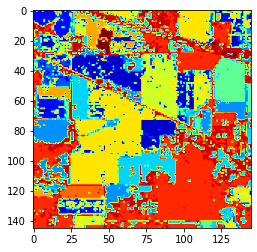

In [10]:
Y_pred_X = model1.predict(X)
class_map1 = np.reshape(Y_pred_X,(nr,nc))
plt.imshow(class_map1, cmap='jet')

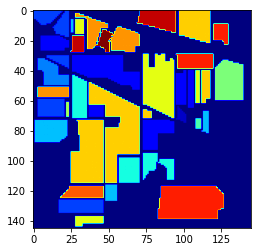

In [11]:
plt.imshow(gt, cmap='jet')

In [12]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
#scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#Training
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000)
mlp.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=100, max_iter=1000)

In [14]:
#Prediction
Y_pred = mlp.predict(X_test)

from sklearn.metrics import accuracy_score
pa_mp = accuracy_score(Y_test, Y_pred, normalize=False)
print("Classification accuracy of MLP is", pa_mp/len(Y_test))



Classification accuracy of MLP is 0.8509756097560975


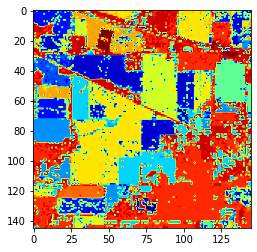

In [15]:
X = scaler.transform(X)
Y_pred_X = mlp.predict(X)
class_map2 = np.reshape(Y_pred_X,(nr,nc))
plt.imshow(class_map2, cmap='jet')

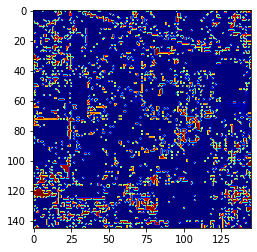

In [16]:
plt.imshow(np.abs(class_map2-class_map1), cmap='jet')

In [24]:
# smoothing
import cv2

def MyFiltering(img_i,sigma):
    nr,nc,nb = img_i.shape
    img_s = np.zeros(shape=(nr,nc,nb))
    for i in range(0,nb):
        one_band = img_i[:,:,i]
        one_band = cv2.blur(one_band,(sigma,sigma))
        img_s[:,:,i] = one_band
    return img_s

sigma = 5
img_s = MyFiltering(img,sigma)

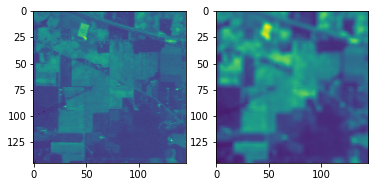

In [25]:
band = 10
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img[:,:,band-1])
axarr[1].imshow(img_s[:,:,band-1])

In [26]:
X_s = img_s.reshape((nr*nc, nb))
X_s.shape

ind = np.where(y > 0)
Xgt_s = X_s[ind[0],:]
ygt = y[ind[0]]

In [27]:
from sklearn.model_selection import train_test_split
X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(Xgt_s, ygt, test_size = 0.80, random_state=42)

In [28]:
model2 = RandomForestClassifier()
model2.fit(X_train_s, Y_train_s)
Y_pred_s = model2.predict(X_test_s)

pa_mp = accuracy_score(Y_test, Y_pred, normalize=False)
print("Classification accuracy of RF is", pa_mp/len(Y_test))

pa_mp = accuracy_score(Y_test_s, Y_pred_s, normalize=False)
print("Classification accuracy of RF after pre-processing is", pa_mp/len(Y_test_s))



Classification accuracy of RF is 0.8509756097560975
Classification accuracy of RF after pre-processing is 0.8752439024390244


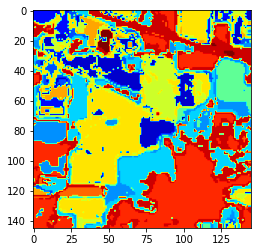

In [29]:
Y_pred_X_s = model1.predict(X_s)
class_map_s = np.reshape(Y_pred_X_s,(nr,nc))
plt.imshow(class_map_s, cmap='jet')

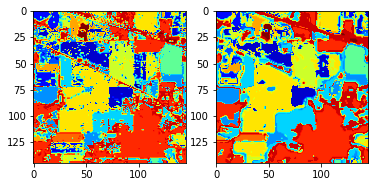

In [30]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(class_map1, cmap='jet')
axarr[1].imshow(class_map_s, cmap='jet')

